In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'
THBIAS = r'$b_{\mathrm{HI}} (k) = P_{\mathrm{HI-m}} (k) / P_{\mathrm{m}} (k)$'
OBSBIAS = r"$b_{\mathrm{HI}} (k) = \sqrt{P_{\mathrm{HI}} (k) / P_{\mathrm{m}} (k)}$"
CORRCOEF = r'r (k) = $\frac{\mathrm{P}_{\mathrm{HI-m}}(k)}{\sqrt{\mathrm{P}_{\mathrm{HI}}(k) \mathrm{P}_{\mathrm{m}}(k)}}$'

In [2]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
print(ds.getAttrs())
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'
ds.tickArgs({'direction':'in', 'labelsize':12})
ds.legendArgs({'frameon':False, 'loc':'upper right', 'fontsize':12}, slc = (0,0))
ds.rowLabelArgs(pos = [0.05, 0.05], txtkw = {'fontsize':14, 'ha':'left', 'va':'bottom'})
ds.colLabelArgs(pos = [0.5, 0.95], txtkw = {'fontsize':14, 'ha':'center', 'va':'top'})
ds.axisArgs({'xscale':'log', 'yscale':'log', 'xlim':[0.11866199299595938, 20]})
ds.axisLabelArgs('both', {'fontsize':14})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle', 'Matter'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
lowbin = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^8$'
midbin =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^9$'
highbin = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
ds.displayAs('HI_res', ['low-bin', 'mid-bin', 'high-bin'], [lowbin, midbin, highbin])
ds.setOrder('HI_res', ['low-bin', 'mid-bin', 'high-bin'])

lowth = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
midth =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
highth = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
ds.displayAs('HI_res', ['low-threshold', 'mid-threshold', 'high-threshold'], [lowth, midth, highth])
ds.setOrder('HI_res', ['low-threshold', 'mid-threshold', 'high-threshold'])

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


In [3]:
print(ds.getAttrVals('HI_res'))

['no key found', 'diemer', 'high-bin', 'high-threshold', 'low-bin', 'low-threshold', 'mid-bin', 'mid-threshold']


# HI auto bins

In [10]:
%%capture
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':['real', 'redshift'],
     'grid_resolution':800, 'path':['fiducial', 'HIbt']}
fg = ds.figrid('HI_res', 'space', 'snapshot', ip)

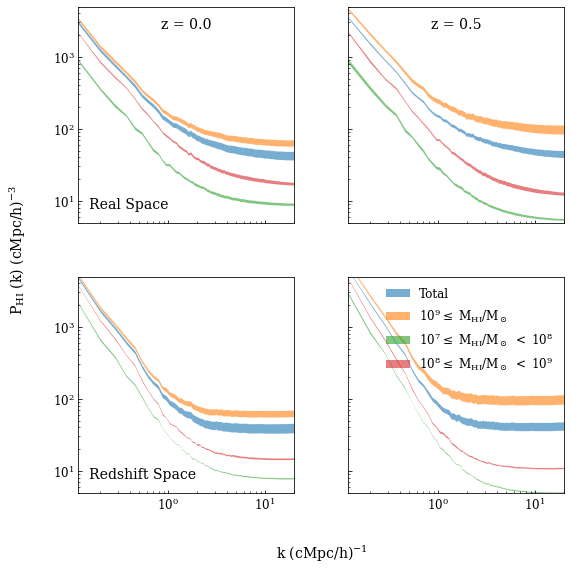

In [11]:
fg.plotArgs('diemer', {'label':'Total'})
fg.autoFill({'alpha':0.6})
fg.setYLabel(YLAB%r"\mathrm{HI}")
fg.setXLabel(XLAB)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5, 5e3)})
fg.legendArgs({}, (-1,-1))
fg.plot()
fg.save('HI-bins_auto_snapshot_space.png')
fg.fig

In [12]:
%%capture
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt']}
fg = ds.figrid('HI_res', 'color', 'snapshot', ip)

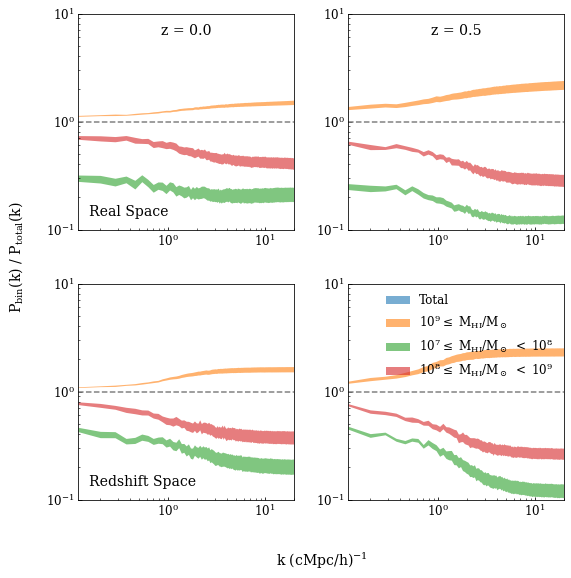

In [13]:
fg.autoNorm('diemer', ['model'])
fg.plotArgs('diemer', {'label':'Total'})
fg.setYLabel(r"P$_{\mathrm{bin}}$(k) / P$_{\mathrm{total}}$(k)")
fg.setXLabel(XLAB)
fg.autoFill({'alpha':0.6})
fg.axisArgs({'ylim':(.1, 10)})
fg.legendArgs({}, (-1,-1))
fg.plotOnes()
fg.plot()
# fg.save('HI-bins_ratios_auto_snapshot_space.png')
fg.fig

# bins HI x galaxy

In [31]:
%%capture
ip = {'HI_fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'gal_res':'diemer', 'color':['red', 'blue', 'resolved'],
     'color_cut':['0.60', 'None'], 'gal_species':'stmass', 'post_process':'no key found'}
fg = ds.figrid('HI_res', 'color', 'snapshot', ip)

No handles with labels found to put in legend.


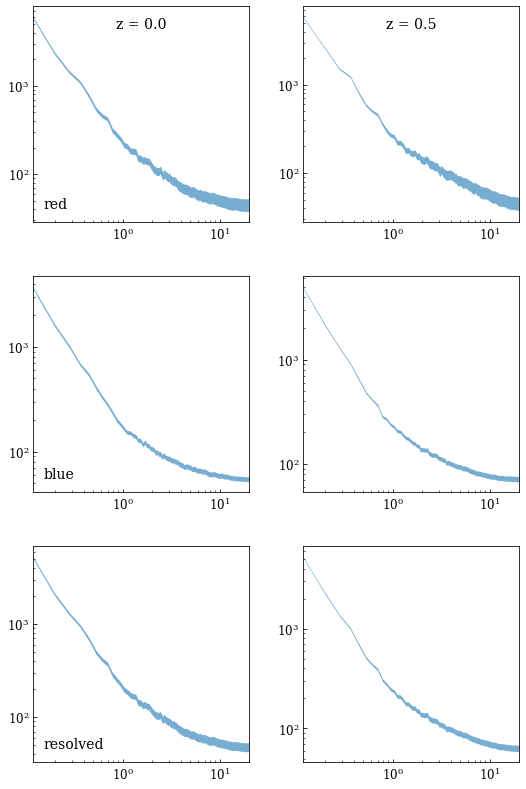

In [32]:
fg.autoFill({'alpha':0.6})
fg.plot()
fg.fig

In [34]:
ds.printMatching({'path':'HIbt', 'is_auto':False})

# HI thresholds auto power

In [22]:
%%capture
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-threshold', 'mid-threshold', 'high-threshold'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':['real', 'redshift'],
     'grid_resolution':800, 'path':['fiducial', 'HIbt']}
fg = ds.figrid('HI_res', 'space', 'snapshot', ip)

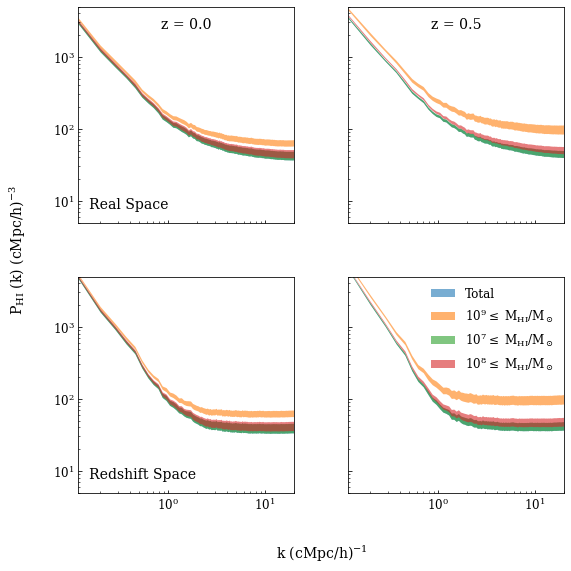

In [23]:
fg.plotArgs('diemer', {'label':'Total'})
fg.autoFill({'alpha':0.6})
fg.setYLabel(YLAB%r"\mathrm{HI}")
fg.setXLabel(XLAB)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5, 5e3)})
fg.legendArgs({}, (-1,-1))
fg.plot()
# fg.save('HI-thresholds_auto_snapshot_space.png')
fg.fig

In [24]:
%%capture
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-threshold', 'mid-threshold', 'high-threshold'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':['real', 'redshift'],
     'grid_resolution':800, 'path':['fiducial', 'HIbt']}
fg = ds.figrid('HI_res', 'space', 'snapshot', ip)

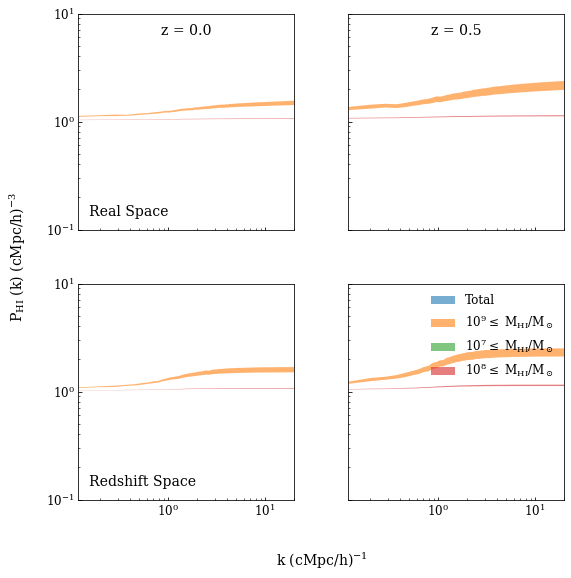

In [25]:
fg.plotArgs('diemer', {'label':'Total'})
fg.autoNorm('diemer', ['model'])

fg.autoFill({'alpha':0.6})
fg.setYLabel(YLAB%r"\mathrm{HI}")
fg.setXLabel(XLAB)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(.1,10)})
fg.legendArgs({}, (-1,-1))
fg.plot()
# fg.save('HI-thresholds_ratio_auto_snapshot_space.png')
fg.fig